In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import calendar
#import prophet
from datetime import datetime
from scipy import stats
import researchpy as rp
from scipy.stats import levene
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv('data/01_bikes_casuales.csv', index_col = 0 )
df.head()

,registro,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,temperatura,sensacion_termica,humedad,viento,casuales
0,1,2018-01-01,winter,0,1,1,1,NO,2,14.110847,18.18125,80.5833,10.749882,331
1,2,2018-01-02,winter,0,1,0,2,SI,2,14.902598,17.68695,69.6087,16.652113,131
2,3,2018-01-03,winter,0,1,0,3,SI,1,8.050924,9.47025,43.7273,16.636703,120
3,4,2018-01-04,winter,0,1,0,4,SI,1,8.200000,10.60610,59.0435,10.739832,108
4,5,2018-01-05,winter,0,1,0,5,SI,1,9.305237,11.46350,43.6957,12.522300,82


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   registro           730 non-null    int64  
 1   fecha              730 non-null    object 
 2   estacion           730 non-null    object 
 3   año                730 non-null    int64  
 4   mes                730 non-null    int64  
 5   vacaciones         730 non-null    int64  
 6   dia_semana         730 non-null    int64  
 7   laborable          730 non-null    object 
 8   clima              730 non-null    int64  
 9   temperatura        730 non-null    float64
 10  sensacion_termica  730 non-null    float64
 11  humedad            730 non-null    float64
 12  viento             730 non-null    float64
 13  casuales           730 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 85.5+ KB


In [4]:
df.shape

(730, 14)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

registro             0
fecha                0
estacion             0
año                  0
mes                  0
vacaciones           0
dia_semana           0
laborable            0
clima                0
temperatura          0
sensacion_termica    0
humedad              0
viento               0
casuales             0
dtype: int64

In [7]:
df["vacaciones"] = df["vacaciones"].astype("category")

In [8]:
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila.
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    return dicc_indices

In [9]:
numericas = df.select_dtypes(include = np.number)
columnas = numericas.columns

In [10]:
indices = detectar_outliers(columnas, numericas)

In [11]:
out_casuales = indices["viento"]

Detectamos que en viento y humedad tenemos 

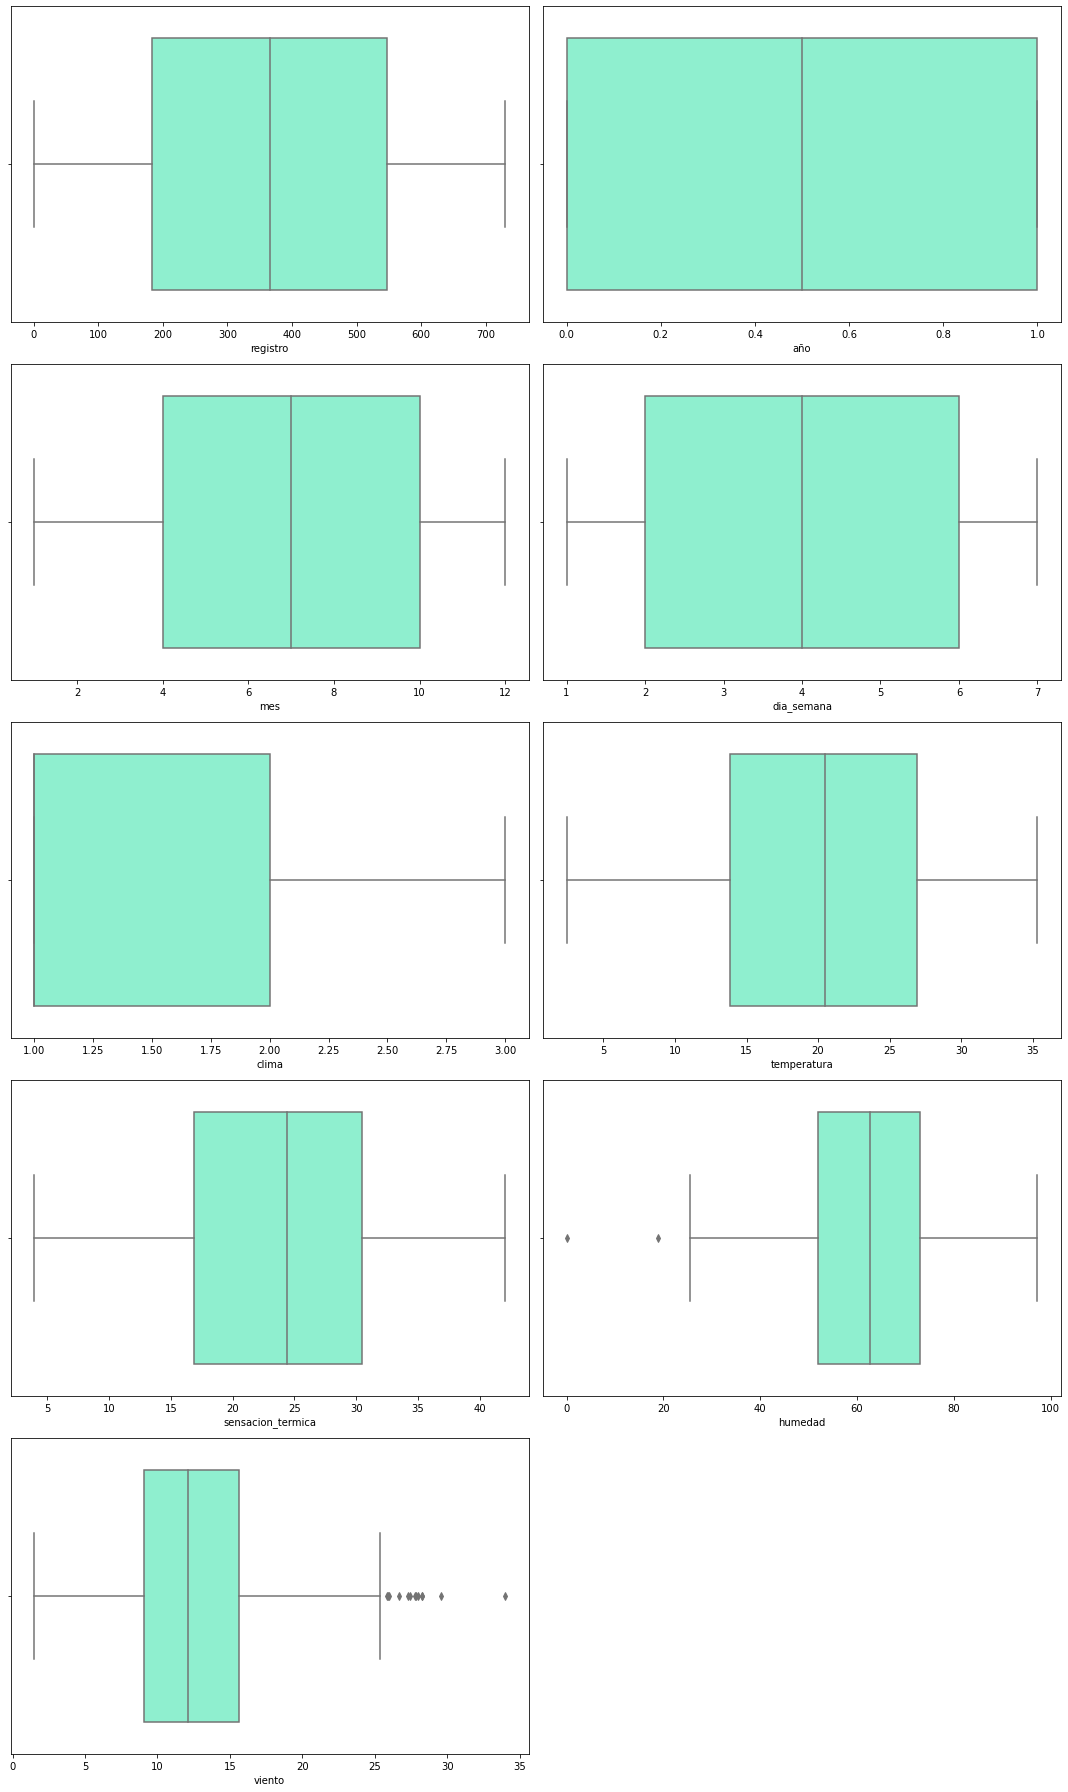

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()


Seria interesante ver que que tienen en común los días en los que los casuales alquilan muchas más bicis

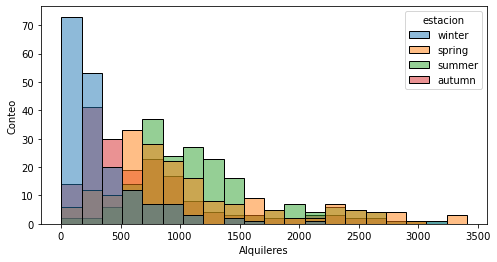

In [13]:
plt.figure(figsize =(8,4))

fig = sns.histplot(x='casuales', data = df, hue = 'estacion')

# establecemos el nombre de los ejes, pero recordad que esto no es obligatorio ya que Seaborn nos los genera automaticamente
fig.set(ylabel='Conteo', xlabel = 'Alquileres')

# Ponemos título a  la gráfica
fig.set_title('')

# mostramos la gráfica
plt.show()


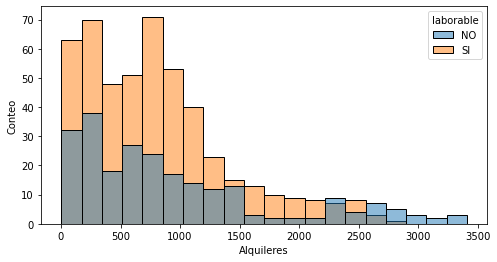

In [14]:
plt.figure(figsize =(8,4))

fig = sns.histplot(x='casuales', data = df, hue = 'laborable')

# establecemos el nombre de los ejes, pero recordad que esto no es obligatorio ya que Seaborn nos los genera automaticamente
fig.set(ylabel='Conteo', xlabel = 'Alquileres')

# Ponemos título a  la gráfica
fig.set_title('')

# mostramos la gráfica
plt.show()

En esta gráfica observamos que los dias en los que mas bicis se alquilan son dias no laborables. (La cola está sesgada hacia la derecha)

<AxesSubplot:xlabel='mes', ylabel='casuales'>

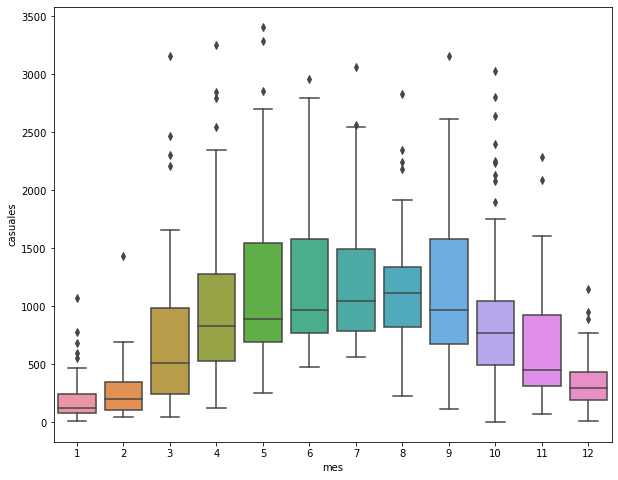

In [60]:
sns.boxplot(data=df, y= "casuales", x = "mes")

baja importancia a alta meses
1-2-12 = 0

5-6-7-9 = 

8-10 = 1

3-4-11 =  


KeyboardInterrupt: 

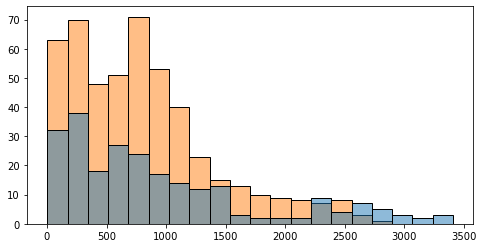

In [61]:
plt.figure(figsize =(8,4))

fig = sns.histplot(x='casuales', data = df, hue = 'laborable')

# establecemos el nombre de los ejes, pero recordad que esto no es obligatorio ya que Seaborn nos los genera automaticamente
fig.set(ylabel='Conteo', xlabel = 'Alquileres')

# Ponemos título a  la gráfica
fig.set_title('')

# mostramos la gráfica
plt.show()

In [15]:
df.sample()

,registro,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,temperatura,sensacion_termica,humedad,viento,casuales
219,220,2018-08-08,summer,0,8,0,3,SI,1,31.365,35.16415,59.2083,12.875725,846


__________

Miramos las asunciones

In [16]:
df.head()

,registro,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,temperatura,sensacion_termica,humedad,viento,casuales
0,1,2018-01-01,winter,0,1,1,1,NO,2,14.110847,18.18125,80.5833,10.749882,331
1,2,2018-01-02,winter,0,1,0,2,SI,2,14.902598,17.68695,69.6087,16.652113,131
2,3,2018-01-03,winter,0,1,0,3,SI,1,8.050924,9.47025,43.7273,16.636703,120
3,4,2018-01-04,winter,0,1,0,4,SI,1,8.200000,10.60610,59.0435,10.739832,108
4,5,2018-01-05,winter,0,1,0,5,SI,1,9.305237,11.46350,43.6957,12.522300,82


Testeamos la normalidad de la var respuesta

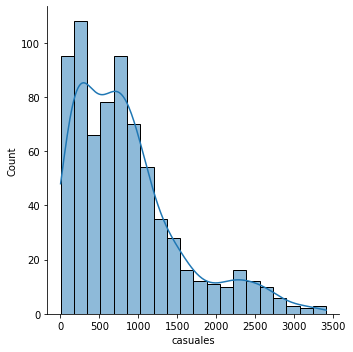

In [17]:
sns.displot(df["casuales"], kde=True)

In [18]:
stats.shapiro(df["casuales"])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

Los datos no son normales porque son menores de 0.05

Procedemos a normalizar la variable respuesta

Raiz cuadrada

In [19]:
import math

In [20]:
df["casuales_raiz"] = df["casuales"].apply(lambda x: math.sqrt(x))

In [21]:
stats.shapiro(df["casuales_raiz"])

ShapiroResult(statistic=0.9811134338378906, pvalue=4.261200459154679e-08)

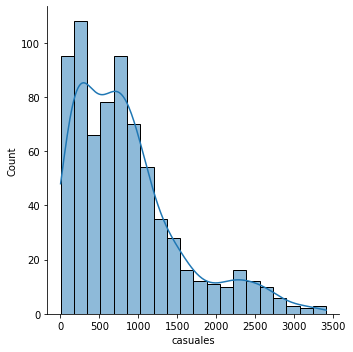

In [22]:
sns.displot(df["casuales"], kde=True)

Box_cox

In [23]:
df['casuales_box'], lambda_ajustada = stats.boxcox(df['casuales'])


In [24]:
stats.shapiro(df["casuales_box"])

ShapiroResult(statistic=0.9915913939476013, pvalue=0.000365116517059505)

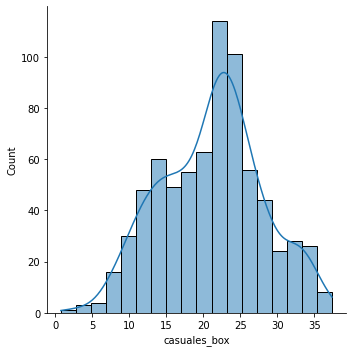

In [25]:
sns.displot(df["casuales_box"], kde=True)

In [26]:
df["casuales_log"] = df["casuales"].apply(lambda x: np.log(x) if x > 0 else 0)

In [27]:
df.head()

,registro,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,temperatura,sensacion_termica,humedad,viento,casuales,casuales_raiz,casuales_box,casuales_log
0,1,2018-01-01,winter,0,1,1,1,NO,2,14.110847,18.18125,80.5833,10.749882,331,18.193405,16.397820,5.802118
1,2,2018-01-02,winter,0,1,0,2,SI,2,14.902598,17.68695,69.6087,16.652113,131,11.445523,11.472437,4.875197
2,3,2018-01-03,winter,0,1,0,3,SI,1,8.050924,9.47025,43.7273,16.636703,120,10.954451,11.076035,4.787492
3,4,2018-01-04,winter,0,1,0,4,SI,1,8.200000,10.60610,59.0435,10.739832,108,10.392305,10.613970,4.682131
4,5,2018-01-05,winter,0,1,0,5,SI,1,9.305237,11.46350,43.6957,12.522300,82,9.055385,9.475537,4.406719


In [28]:
stats.shapiro(df["casuales_log"])

ShapiroResult(statistic=0.9472163915634155, pvalue=1.8073885266976222e-15)

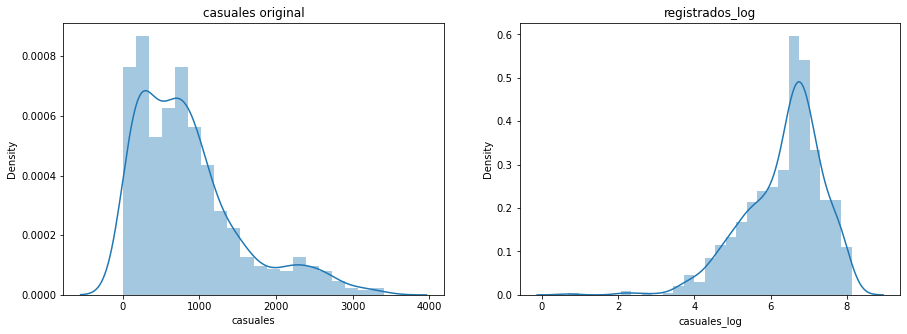

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('casuales original')
axes[1].set_title('registrados_log')

sns.distplot(df["casuales"] ,ax = axes[0])
sns.distplot(df["casuales_log"], ax = axes[1]);

#### Conclusion:

Observamos que nuestro p_valor > 0.05 nuestros datos NO son normales. 

- Min Scaler

In [30]:
minmax = MinMaxScaler()
minmax.fit(df[['casuales']])

MinMaxScaler()

In [31]:
X_normalizadas = minmax.transform(df[['casuales']])

In [32]:
X_normalizadas.min(axis=0)

array([0.])

In [33]:
X_normalizadas.max(axis=0)

array([1.])

In [34]:
numericas_minmax= pd.DataFrame(X_normalizadas, columns= ['casuales'])
numericas_minmax.head()

,casuales
0,0.096538
1,0.037852
2,0.034624
3,0.031103
4,0.023474


In [35]:
df['casuales_min_max'] = numericas_minmax
df.head()

,registro,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,temperatura,sensacion_termica,humedad,viento,casuales,casuales_raiz,casuales_box,casuales_log,casuales_min_max
0,1,2018-01-01,winter,0,1,1,1,NO,2,14.110847,18.18125,80.5833,10.749882,331,18.193405,16.397820,5.802118,0.096538
1,2,2018-01-02,winter,0,1,0,2,SI,2,14.902598,17.68695,69.6087,16.652113,131,11.445523,11.472437,4.875197,0.037852
2,3,2018-01-03,winter,0,1,0,3,SI,1,8.050924,9.47025,43.7273,16.636703,120,10.954451,11.076035,4.787492,0.034624
3,4,2018-01-04,winter,0,1,0,4,SI,1,8.200000,10.60610,59.0435,10.739832,108,10.392305,10.613970,4.682131,0.031103
4,5,2018-01-05,winter,0,1,0,5,SI,1,9.305237,11.46350,43.6957,12.522300,82,9.055385,9.475537,4.406719,0.023474


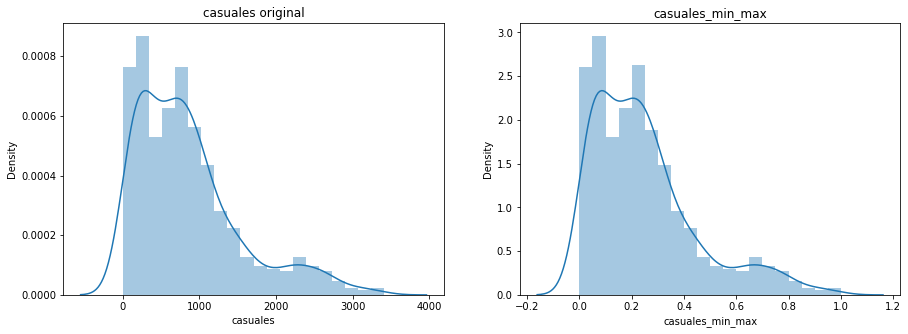

In [36]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('casuales original')
axes[1].set_title('casuales_min_max')

sns.distplot(df['casuales'] ,ax = axes[0])
sns.distplot(df['casuales_min_max'], ax = axes[1]);

In [37]:
stats.shapiro(df["casuales_min_max"])

ShapiroResult(statistic=0.8850969076156616, pvalue=7.660317123860226e-23)

#### Conclusiones:

Observamos que nuestro p_valor > 0.05 nuestros datos NO son normales. 

In [38]:
#Borramos las columnas que no necesitamos 
df.drop(['casuales_raiz','casuales_box', 'casuales_log', 'casuales_min_max'], axis=1, inplace=True )

In [39]:
df.head(2)

,registro,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,temperatura,sensacion_termica,humedad,viento,casuales
0,1,2018-01-01,winter,0,1,1,1,NO,2,14.110847,18.18125,80.5833,10.749882,331
1,2,2018-01-02,winter,0,1,0,2,SI,2,14.902598,17.68695,69.6087,16.652113,131


--- 

- Análisis de correlación 

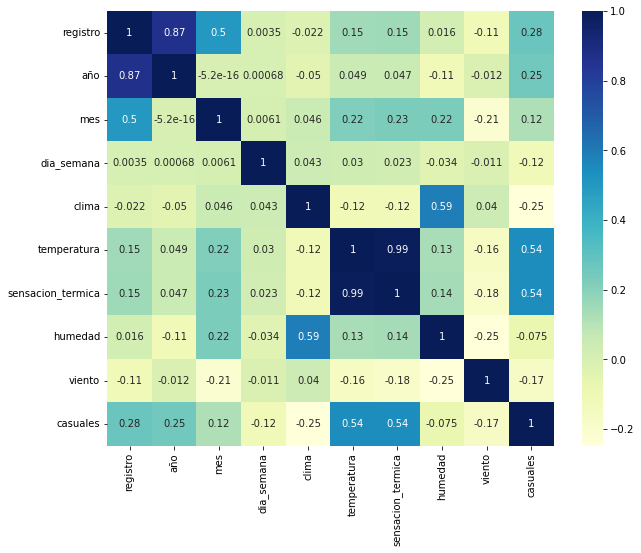

In [40]:
sns.heatmap(df.corr(), 
            cmap = "YlGnBu", 
           annot = True);

In [41]:
df.corr()

,registro,año,mes,dia_semana,clima,temperatura,sensacion_termica,humedad,viento,casuales
registro,1.000000,8.660262e-01,4.982507e-01,0.003548,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604
año,0.866026,1.000000e+00,-5.162656e-16,0.000684,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502
mes,0.498251,-5.162656e-16,1.000000e+00,0.006080,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208
dia_semana,0.003548,6.843499e-04,6.079650e-03,1.000000,0.042703,0.029929,0.023235,-0.034223,-0.011361,-0.120906
clima,-0.021862,-5.032247e-02,4.561335e-02,0.042703,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044
temperatura,0.150738,4.878919e-02,2.190833e-01,0.029929,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731
sensacion_termica,0.152773,4.721519e-02,2.264302e-01,0.023235,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362
humedad,0.016080,-1.125471e-01,2.249368e-01,-0.034223,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211
viento,-0.112667,-1.162435e-02,-2.080131e-01,-0.011361,0.039769,-0.158186,-0.183876,-0.248506,1.000000,-0.167995
casuales,0.275604,2.505017e-01,1.212079e-01,-0.120906,-0.246044,0.542731,0.543362,-0.075211,-0.167995,1.000000


Observamos que temperatura y sensación térmica correlacionan de manera casi total, por lo tanto lo consideramos información redundante y decidimos eliminar una. Vemos más decimales con el df para valorar y vemos que sensacion térmica correlaciona mas.


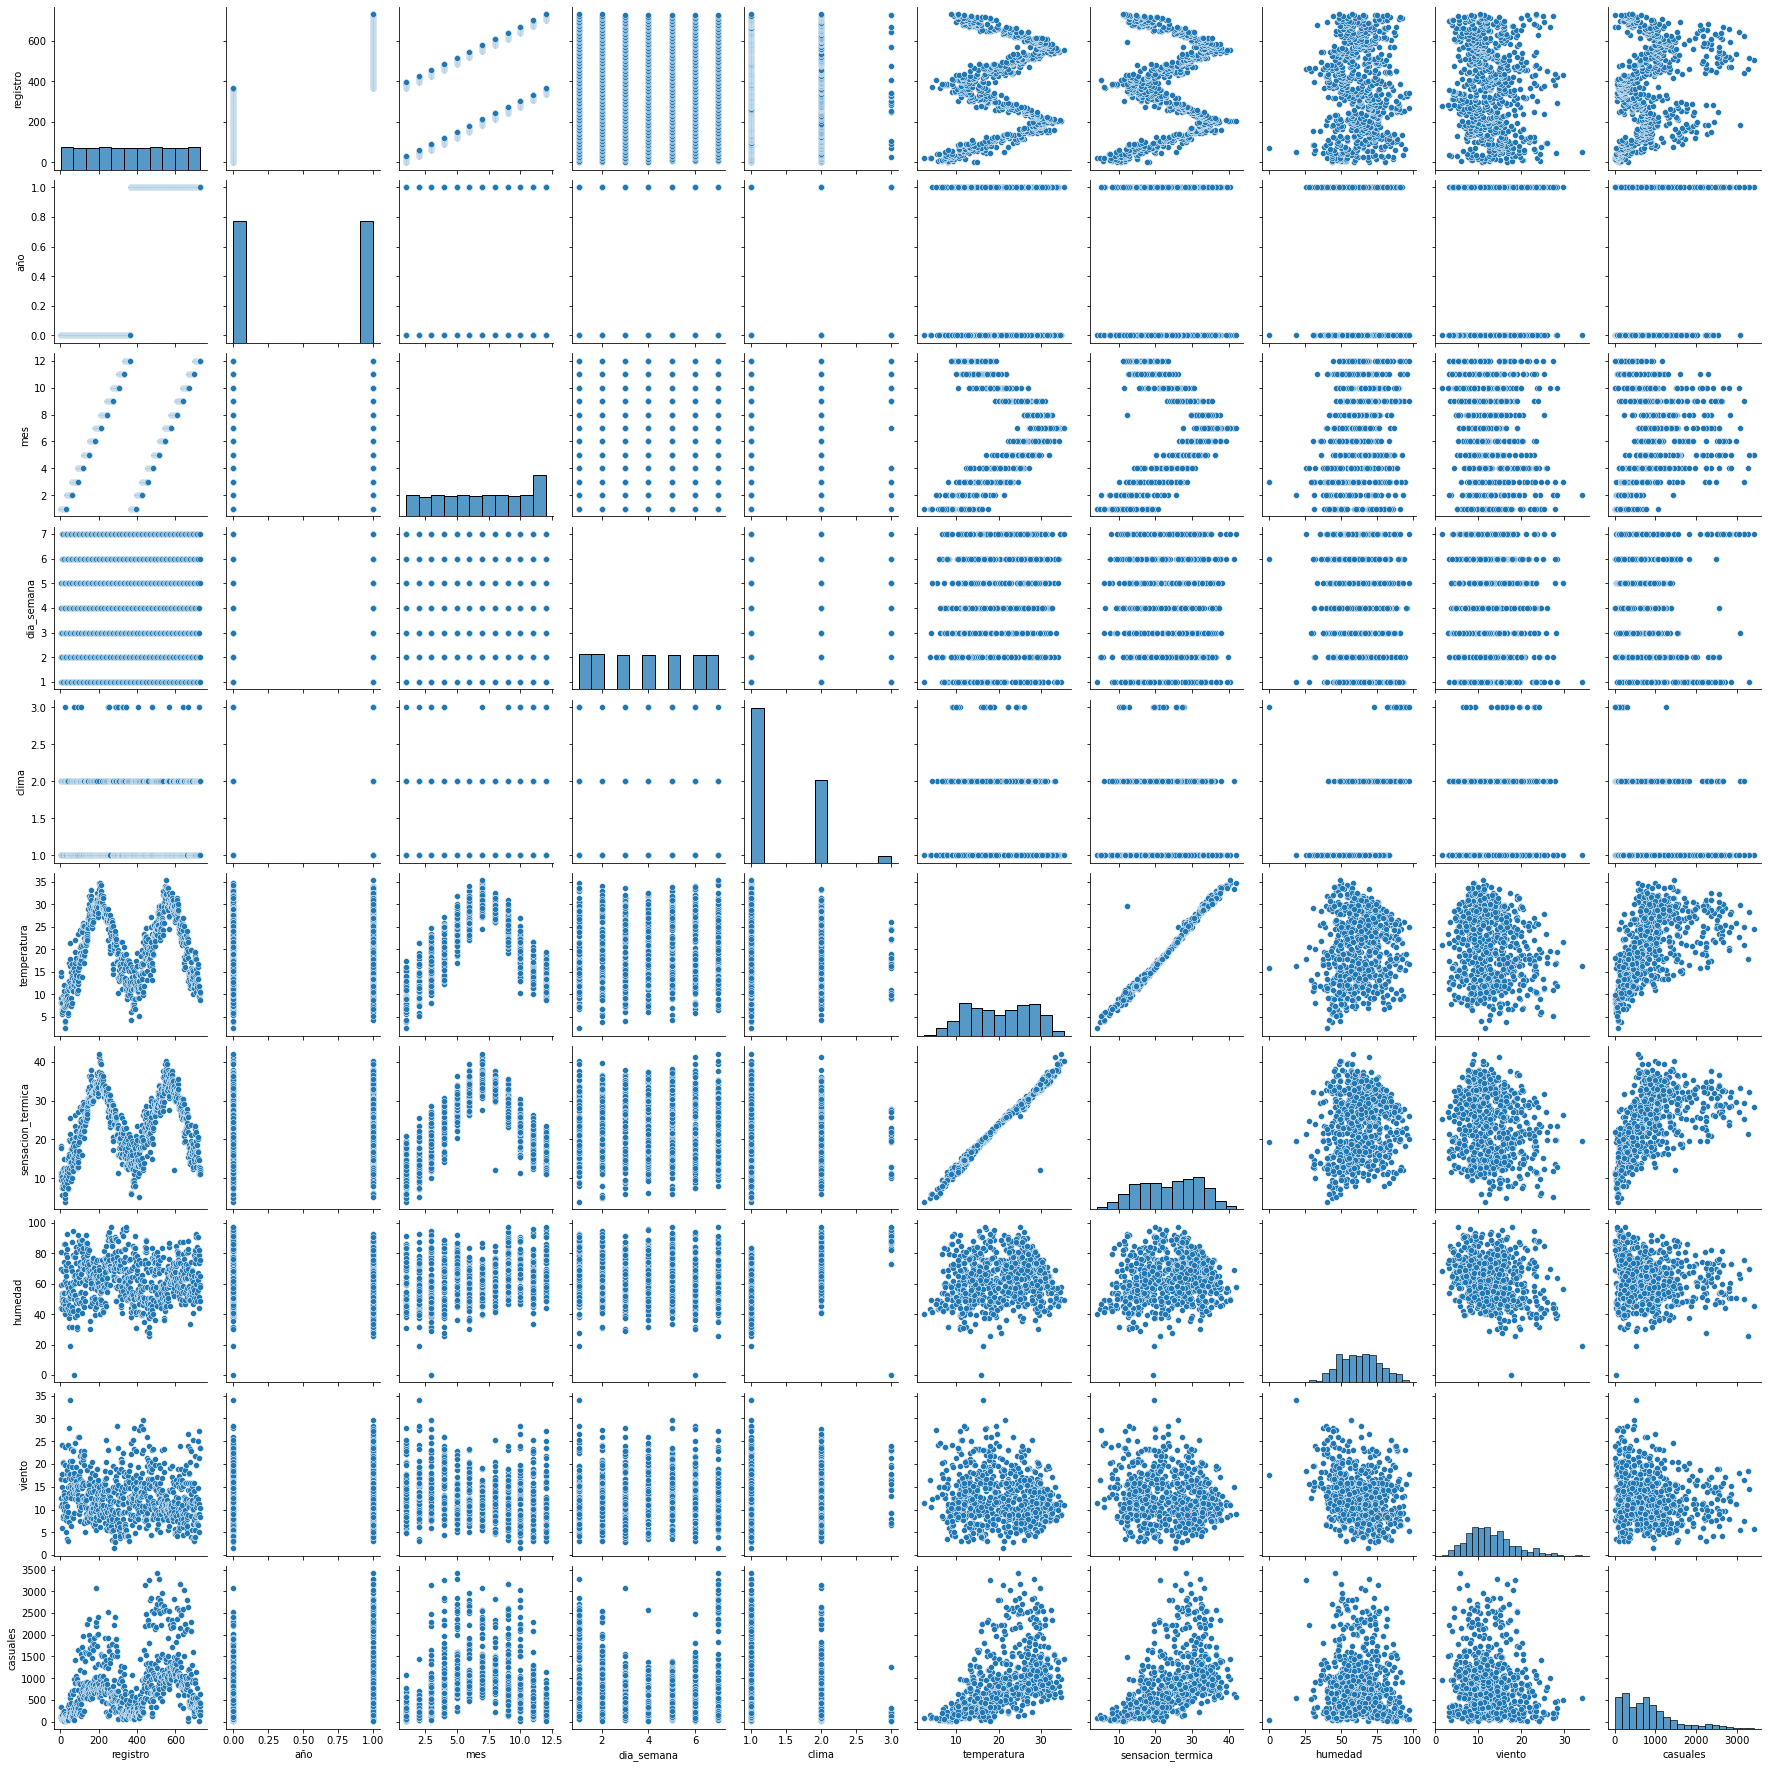

In [42]:
sns.pairplot(df)

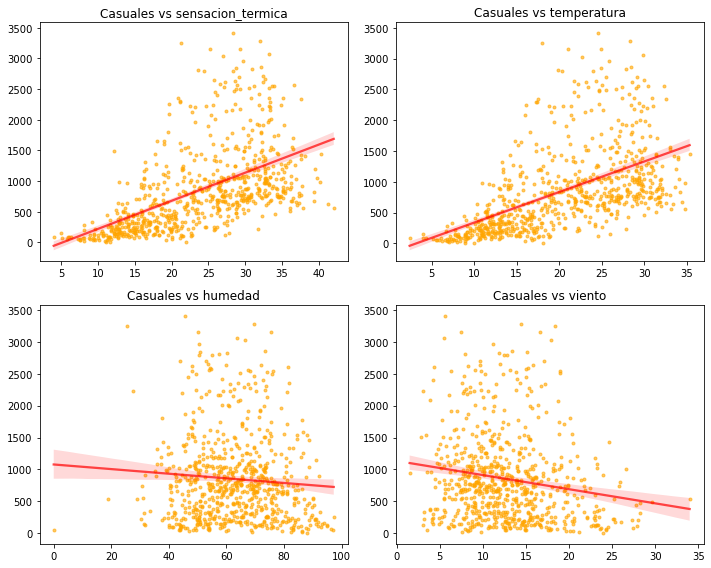

In [47]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
axes = axes.flat
lista_columnas = ['sensacion_termica', 'temperatura', 'humedad', 'viento']
for i, colum in enumerate(lista_columnas):
    sns.regplot(
        x = df[colum],
        y = df["casuales"],
        color = "orange",
        marker = ".",
        scatter_kws = {"alpha": 0.6},
        line_kws = {"color": "red", "alpha": 0.7 },
        ax = axes[i])
    axes[i].set_title(f"Casuales vs {colum}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.tight_layout();

In [48]:
#Variables que no nos aportan para nuestro modelo o que son redundantes, eliminamos
df.drop(["temperatura", "registro"], axis = 1, inplace = True)


In [49]:
#Comprobamos los cambios hechos
df.head()

,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,sensacion_termica,humedad,viento,casuales
0,2018-01-01,winter,0,1,1,1,NO,2,18.18125,80.5833,10.749882,331
1,2018-01-02,winter,0,1,0,2,SI,2,17.68695,69.6087,16.652113,131
2,2018-01-03,winter,0,1,0,3,SI,1,9.47025,43.7273,16.636703,120
3,2018-01-04,winter,0,1,0,4,SI,1,10.60610,59.0435,10.739832,108
4,2018-01-05,winter,0,1,0,5,SI,1,11.46350,43.6957,12.522300,82


In [50]:
df.to_csv("data/02_casuales_limpio.csv")